# Erasmus Neural Networks
http://michalbereta.pl/nn
## Perceptron learning


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Simple perceptron example

Start with initial weights, check the answer for some input values. If there is a misclassification, update the weights.

Observe that, even after one update, the perceptron is closer to the correct answer.

Experiment with different starting values.

In [107]:
#!/usr/bin/env python
import numpy as np

#initial weights
w = np.array([0.3, -0.4])
w0 = 0.1 #bias weight

print('initial weights, w=',w,' w0=',w0)

#input vector
x = np.array([-0.5, 0.9 ])
#class label, 1 or -1
d = 1 

print('example x=',x,' is from class ',d)

#learning rate
eta = 0.1


y = np.dot(w,x) + w0
print('weighted sum, y=',y)

#activation function
if y > 0:
    u = 1
else:
    u = -1
    
print('percetron says: x is from class ',u)
    
if u!=d:
    w[0] = w[0] + eta*x[0]*d
    w[1] = w[1] + eta*x[1]*d
    w0 = w0 + eta*1*d


print('weights after update, w=',w,' w0=',w0)

y = np.dot(w,x) + w0
print('weighted sum, y=',y)

#activation function
if y > 0:
    u = 1
else:
    u = -1    
print('percetron says: x is from class ',u)


initial weights, w= [ 0.3 -0.4]  w0= 0.1
example x= [-0.5  0.9]  is from class  1
weighted sum, y= -0.41000000000000003
percetron says: x is from class  -1
weights after update, w= [ 0.25 -0.31]  w0= 0.2
weighted sum, y= -0.20400000000000001
percetron says: x is from class  -1


### Simple perceptron example 2

Start with initial weights, check the answer for some input values. 

If there is a misclassification, update the weights until the answer is correct.

Experiment with different starting values.

In [108]:
#!/usr/bin/env python
import numpy as np

#initial weights
w = np.array([0.3, -0.4])
w0 = 0.1 #bias weight

#input vector
x = np.array([-0.5, 0.9 ])
#class label
d = 1 

print('example x=',x,' is from class ',d)

#learning rate
eta = 0.1


y = np.dot(w,x) + w0
print('weighted sum, y=',y)

#activation function
if y > 0:
    u = 1
else:
    u = -1
    
print('percetron says: x is from class ',u)
    
while u!=d:
    w[0] = w[0] + eta*x[0]*d
    w[1] = w[1] + eta*x[1]*d
    w0 = w0 + eta*1*d
    print('\nweights after update, w=',w,' w0=',w0)
    y = np.dot(w,x) + w0
    print('weighted sum, y=',y)
    #activation function
    if y > 0:
        u = 1
    else:
        u = -1    
    print('percetron says: x is from class ',u)

print('learning done')

example x= [-0.5  0.9]  is from class  1
weighted sum, y= -0.41000000000000003
percetron says: x is from class  -1

weights after update, w= [ 0.25 -0.31]  w0= 0.2
weighted sum, y= -0.20400000000000001
percetron says: x is from class  -1

weights after update, w= [ 0.2  -0.22]  w0= 0.30000000000000004
weighted sum, y= 0.0020000000000000573
percetron says: x is from class  1
learning done


### 2D data from normal distributions

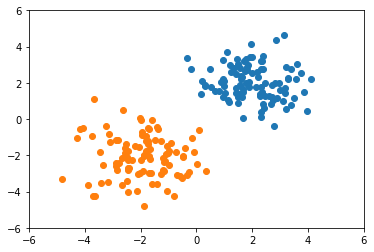

In [109]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#example data from two classes; 2D normal distributions
num = 100
x2 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
xmin = -6
xmax = 6
ymin = -6
ymax = 6

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x2[:,0],x2[:,1],'o')

plt.show()

### Perceptron online learning animation

#### DO NOT USE THIS CODE AS A TEMPLATE FOR YOUR PROGRAMS!

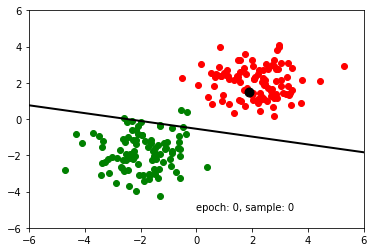

In [110]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from time import time


num = 100
x0 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
x0 = np.hstack((np.repeat(1,num).reshape(num,1), x0)) #adding bias signal explicitly
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
x1 = np.hstack((np.repeat(1,num).reshape(num,1), x1)) #adding bias signal explicitly
d1 = np.repeat(1, num)

X = np.vstack((x0,x1))
d = np.hstack((d0,d1))


def perceptron(x, w):
    u = np.dot(x, w)
    y = 1 if u>0 else 0
    return y

epoch = 100
eta = 0.01

iteration = epoch*X.shape[0]

weights = np.random.random(3) #perceptoron weights
a = -weights[1]/weights[2]
b = -weights[0]/weights[2]

xx = np.linspace(-6 ,6 ,100)
yy = a*xx+b



fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.scatter(x0[:,1], x0[:,2], color='r')
ax.scatter(x1[:,1], x1[:,2], color='g')
ax.plot(xx,yy, lw=2, c='k')

def animate(i):
    flag=False
    e, p = divmod(i,X.shape[0])
    global weights
    y = perceptron(X[p,:], weights)
    if y==1 and d[p]==0:
        flag = True
        weights -= eta*X[p,:]
    if y==0 and d[p]==1:
        flag=True
        weights += eta*X[p,:]
    if flag:
        a = -weights[1]/weights[2]
        b = -weights[0]/weights[2]
        yy = a*xx+b
        ax.clear()
        ax.scatter(x0[:,1], x0[:,2], color='r')
        ax.scatter(x1[:,1], x1[:,2], color='g')
        ax.scatter(X[p,1], X[p,2], color='k', s=80)
        ax.plot(xx,yy, lw=2, c='k')
        ax.text(0.0, -5.0, 'epoch: {0}, sample: {1}'.format(e,p))
        ax.set_xlim(-6, 6)
        ax.set_ylim(-6, 6)
    return ax,

dt = 1./30
t0 = time()
animate(0)
t1 = time()
interval = 100 * dt - (t1 - t0)

anim = animation.FuncAnimation(fig, animate, frames=iteration, interval=interval)

plt.show()

### Perceptron batch learning animation

#### DO NOT USE THIS CODE AS A TEMPLATE FOR YOUR PROGRAMS!

In [111]:
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#example data from two classes, 2D normal distribution
num = 100
x2 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
xmin = -6
xmax = 6
ymin = -6
ymax = 6

#initialization of weights - random, smal values, positive and negative values
#w[0] is the bias weight
w = 2*np.random.rand(3) - 1
#w = np.zeros(3) #try it: in general, initialization of weigths to zero is not a good idea
print(w)


delta = 0.01 #accuracy of the grid for vizualization only
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
Z = X*w[1] + Y*w[2] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x2[:,0],x2[:,1],'o')

#this function is one iteration of perceptron learning
def update(i):
    global w
    print()
    print('iteration=',i)

    #perceptron responses to examplse from class 1, 
    #we assume they should be  > 0
    ans1 = np.dot(x1, w[1:]) + w[0]  
    errors1 = (ans1<=0).sum() # number of missclassifications from class 1
    print('errors1=',errors1)
    M1 = x1[ans1<=0] #selected examples that are missclassified from class 1
    criterion1 = ans1[ans1<=0].sum() #perceptron criterion - part 1 from the class 1
    print('criterion1=',criterion1)

    #perceptron responses to examplse from class 2, 
    #we assume they should be  <= 0    
    ans2 = np.dot(x2, w[1:]) + w[0]
    errors2 = (ans2>0).sum() # number of missclassifications from class 2
    print('errors2=',errors2)
    M2 = x2[ans2>0] #selected examples that are missclassified from class 2
    criterion2 = ans2[ans2>0].sum()#perceptron criterion - part 2 from the class 1
    print('criterion2=',criterion2)
    
    #full perceptron criterion -we should minimize it 
    criterion = np.abs(criterion1) + np.abs(criterion2) 
    print('criterion=',criterion)

    M1 = M1.sum(axis=0) #summed errors from class 1
    M2 = M2.sum(axis=0) #summed errors from class 2
    M = M1 - M2 #vector giving the direction of the change of the weights vector
    
    print('M=',M)
    eta = 0.005 #learning rate
    
    #weights modification
    if np.abs( M.sum() ) > 0: #or: if criterion > 0:
        w[1] += eta*M[0]
        w[2] += eta*M[1]
        w[0] += eta*(errors1-errors2) #bias weight modification 
        #a trick : normalization of the weight vector
        #connected with the learning rate - both influence the convergence of the training process        
        w = w/np.linalg.norm(w) 
    else:
        print('learning done')
    print('w=',w)
    
    #vizualization
    plt.clf()
    plt.plot(x1[:,0],x1[:,1],'o')
    plt.plot(x2[:,0],x2[:,1],'o')
    Z = X*w[1] + Y*w[2] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start learning
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print('end')

[-0.48948532  0.00806003 -0.00878046]


<IPython.core.display.Javascript object>

end


<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/home/tiago/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/tiago/anaconda3/lib/python3.8/site-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


### Line separating two points (no bias version)

Does it work for any two points?

Check for example:

```
x1 = np.array([-2, -2]) #from class 1
x2 = np.array([-4, -4]) # from class -1
```

In [112]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


xmin = -6
xmax = 6
ymin = -6
ymax = 6

x1 = np.array([4, 4]) #from class 1
x2 = np.array([-4, -4]) # from class -1


w = (x1 - x2)/2.0
print(w)


delta = 0.01 #accuracy of the grid for vizualization only
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[0],x1[1],'o')
plt.plot(x2[0],x2[1],'o')
plt.plot(0,0,'o') #origin
    
#vizualization
Z = X*w[0] + Y*w[1]
Z[Z>0] = 1
Z[Z<=0] = -1
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()
print('end')

[4. 4.]


<IPython.core.display.Javascript object>

end


<IPython.core.display.Javascript object>

### Line separating two points (version with bias)

Does it work for any two points?

Check for example:

```
x1 = np.array([-2, -2]) #from class 1
x2 = np.array([-4, -4]) # from class -1
```

In [113]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


xmin = -6
xmax = 6
ymin = -6
ymax = 6

x1 = np.array([-2, -1]) #from class 1
x2 = np.array([-4, -4]) # from class -1

v = x1 - x2
mid = (x1 + x2)/2.0

w = v
w0 = -v[0]*mid[0] - v[1]*mid[1]

print(w, w0)

print('for x1: ', np.dot(w,x1) + w0)
print('for x2: ', np.dot(w,x2) + w0)

delta = 0.01 #accuracy of the grid for vizualization only
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[0],x1[1],'o')
plt.plot(x2[0],x2[1],'o')
plt.plot(0,0,'o') #origin
    
#vizualization
Z = X*w[0] + Y*w[1] + w0
Z[Z>0] = 1
Z[Z<=0] = -1
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=abs(Z).max(), vmin=-abs(Z).max())
 

plt.show()

print ('end')

[2 3] 13.5
for x1:  6.5
for x2:  -6.5


<IPython.core.display.Javascript object>

end


<IPython.core.display.Javascript object>

### Task 1
What happens when the data generated and used for perceptron training is not linearly separable? Can the perceptron algorithm still be used? How is the value of training rate (eta) important in such a case?



In [114]:
#If the data isn't linearly separable, the perceptron algorithm will not work, finding a separation with many errors but, by using polar coordinates, some cases can be solved. Training rate basically helps the user decide the strategy of update of the model. Higher values might overshot the convergence point while smaller values might take a long time to find it. The eta value is important in the cases of the data being not linearly separable because depending on the value, it might speed or slow the time it takes to recognize the data as such.

### Task 2

Prepare your own implementation of perceptron learning

– Use the online or batch mode

– Be ready for any number of attributes (inputs to perceptron)


3
Solution found


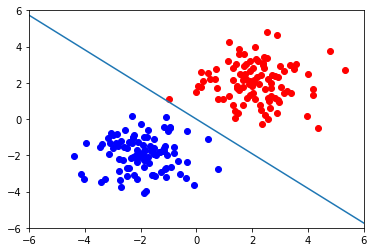

In [119]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Setup of data

# Number of points
num = 100

# Entry is of type 1 if y > 0 and type -1 if y <= 0
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
x1c = x1
x1 = np.hstack((x1, np.full((num,1),1)))
x2 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
x2c = x2
x2 = np.hstack((x2, np.full((num,1),-1)))
x = np.concatenate((x1, x2), axis=0)

dim = x.shape[1]
dim2 = x.shape[0]
print(dim)

# Make data the same shape as weights (after removal of class) for dot
x = np.hstack((np.full((dim2,1),1),x))


# Limit number of updates
timeout = 10*dim2


# Setup of weights and eta

# Weights
w = 2 * np.random.rand(dim) - 1
w[0] = 0

# Eta = 0.2
eta = 0.25


# Loop

notDone = True
count = 0
while notDone and count < timeout:
    count += 1
    notDone = False
    for xi in x:
        d = xi[-1].astype('int')
        r = np.dot(xi[:-1],w)
        if (r > 0 and d == -1) or (r <= 0 and d == 1):
            notDone = True
            for i, wi in enumerate(w):
                w[i] = wi + eta*d*xi[i]


# Result output

if notDone:
    print('Error')
else:
    print('Solution found')


# Graphical display

x1s = np.hsplit(x1c,2)
x2s = np.hsplit(x2c,2)

plt.plot(x1s[0], x1s[1], 'ro')
plt.plot(x2s[0], x2s[1], 'bo')
l = np.linspace(-6, 6, 1000)
plt.plot(l, -(w[1]/w[2])*l - w[0]/w[2], linestyle='solid')
plt.axis([-6, 6, -6, 6])
plt.show()

### Task 3

Use the 5D data to train your perceptron based on examples from data5D_train.csv. Last column is the class label.

Generate answers (as 1 or -1) for data in data5D_test.csv and save them to a file.

In [135]:
import numpy as np
import csv



#Training

# Data fetch from document
data = np.loadtxt('data5D_train.csv')

dim = data.shape[1]
dim2 = data.shape[0]

# Make data the same shape as weights (after removal of class) for dot
x = np.hstack((np.full((dim2,1),1),data))


# Limit number of updates
timeout = 10*dim2


# Setup of weights and eta

# Weights
w = 2 * np.random.rand(dim) - 1
w[0] = 0

# Eta = 0.2
eta = 0.25


# Loop

notDone = True
count = 0
while notDone and count < timeout:
    count += 1
    notDone = False
    for xi in x:
        d = xi[-1].astype('int')
        r = np.dot(xi[:-1],w)
        if (r > 0 and d == -1) or (r <= 0 and d == 1):
            notDone = True
            for i, wi in enumerate(w):
                w[i] = wi + eta*d*xi[i]



#Testing

# Data fetch from document and formatting
data = np.loadtxt('data5D_test.csv')

dim = data.shape[1]
dim2 = data.shape[0]

# Make data the same shape as weights (after removal of class) for dot
x = np.hstack((np.full((dim2,1),1),data))


# Open file to write the results
f = open("test_results.txt", "w")

# Data evaluation
for xi in x:
    r = np.dot(xi,w)
    for n in xi[1:]:                                                                # TO PRINT ONLY THE GIVEN CLASS, REMOVE THIS LINE
        f.write(str(n)+' ')                                                         # AND THIS ONE
    if r > 0:
        f.write(str(1)+'\n')
    else:
        f.write(str(-1)+'\n')

# Close file
f.close()

In [136]:
#Training and Testing on the previous code block